In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df= pd.read_csv('EmployeeData.csv')

In [45]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [47]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [48]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [49]:
df.dtypes.index

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [50]:
categorical_columns=[]
numeric_columns=[]
for i in df.dtypes.index:
    if df[i].dtype=='object':
        categorical_columns.append(i)
    else:
        numeric_columns.append(i)

In [51]:
categorical_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [52]:
numeric_columns

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [53]:
cardinality ={}
for col in df.columns:
    cardinality[col]= df[col].nunique()
cardinality

{'Age': 43,
 'Attrition': 2,
 'BusinessTravel': 3,
 'DailyRate': 886,
 'Department': 3,
 'DistanceFromHome': 29,
 'Education': 5,
 'EducationField': 6,
 'EmployeeCount': 1,
 'EmployeeNumber': 1470,
 'EnvironmentSatisfaction': 4,
 'Gender': 2,
 'HourlyRate': 71,
 'JobInvolvement': 4,
 'JobLevel': 5,
 'JobRole': 9,
 'JobSatisfaction': 4,
 'MaritalStatus': 3,
 'MonthlyIncome': 1349,
 'MonthlyRate': 1427,
 'NumCompaniesWorked': 10,
 'Over18': 1,
 'OverTime': 2,
 'PercentSalaryHike': 15,
 'PerformanceRating': 2,
 'RelationshipSatisfaction': 4,
 'StandardHours': 1,
 'StockOptionLevel': 4,
 'TotalWorkingYears': 40,
 'TrainingTimesLastYear': 7,
 'WorkLifeBalance': 4,
 'YearsAtCompany': 37,
 'YearsInCurrentRole': 19,
 'YearsSinceLastPromotion': 16,
 'YearsWithCurrManager': 18}

<AxesSubplot:xlabel='Attrition', ylabel='count'>

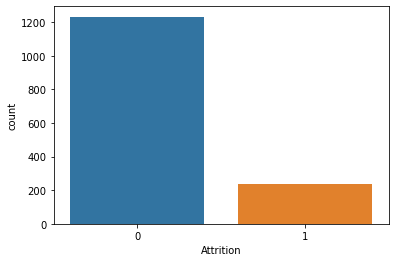

In [54]:
sns.countplot(df['Attrition'])

In [55]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Feature Engineering

In [56]:
df[categorical_columns]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

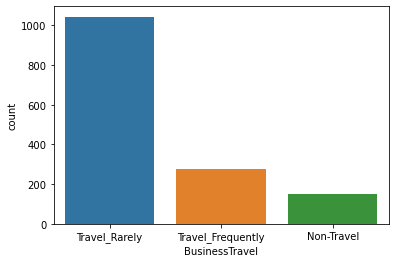

In [57]:
sns.countplot(df['BusinessTravel'])

# Balancing unbalanced data

In [16]:
#from imblearn.over_sampling import SMOTE

In [47]:
#smote = SMOTE(random_state=42)

In [48]:
#smote

In [49]:
attrition= {'Yes':1,'No':0}
df['Attrition'] = df['Attrition'].map(attrition)

In [50]:
Attrition= {'Yes':1,'No':0}
df['Attrition'] = df['Attrition'].map(Attrition)

In [51]:
df['Attrition'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Attrition, dtype: float64

In [58]:
df =df.drop('Over18',axis=1)

In [59]:
df = pd.get_dummies(df)

In [60]:
all_columns= df.columns
all_columns =list(all_columns)
del all_columns[1]
all_columns.append('Attrition')
df = df[all_columns]
y = df['Attrition']
X = df.iloc[:,:-1]

In [61]:
all_columns

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'Jo

In [62]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,0,1,0
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,0,0


In [63]:
df.isnull().sum()

Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager     

In [64]:
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,0,0,0,0,0,0,1,0,1,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,3,1,2064,2,87,4,2,...,1,0,0,0,0,0,1,0,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,1,0,0,1,0,1,0


In [65]:
#X_res, y_res = smote.fit_resample(X,y)

In [66]:
#from sklearn.emsemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer,confusion_matrix, accuracy_score, f1_score, classification_report,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [67]:
#X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.25,random_state=42)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [69]:

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

param_grid = {
    'learning_rate': [0.1,0.05],
    'n_estimators': [100,150],
    'max_depth': [2,4,5],
    'min_samples_split':[2,4]
}
gs = GridSearchCV(GradientBoostingClassifier(random_state=42),
                  param_grid= param_grid,
                  scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [2, 4, 5],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 150]},
             refit='AUC', return_train_score=True,
             scoring={'AUC': 'roc_auc',
                      'Accuracy': make_scorer(accuracy_score)})

In [70]:
y_pred = gs.predict(X_test)

In [71]:
f1_score(y_pred,y_test)

0.3283582089552239

In [72]:
print("Accuracy on test data by using GradientBoostingClassifier... ")
round(accuracy_score(y_pred,y_test),3)*100

Accuracy on test data by using GradientBoostingClassifier... 


87.8

In [73]:
print("Classification Report: ")
print(classification_report(y_pred,y_test))

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       349
           1       0.23      0.58      0.33        19

    accuracy                           0.88       368
   macro avg       0.60      0.74      0.63       368
weighted avg       0.94      0.88      0.90       368



In [82]:
print("Confusion matrix....")
confusion_matrix(y_pred,y_test)

Confusion matrix....


array([[312,  37],
       [  8,  11]], dtype=int64)

In [83]:
roc_auc_score(y_pred,y_test)

0.7364650882219876

In [84]:
gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_split': 4,
 'n_estimators': 150}

In [85]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred1 = rf.predict(X_test)

In [86]:
f1_score(y_pred1,y_test)

0.1785714285714286

In [87]:
accuracy_score(y_pred1,y_test)

0.875

In [88]:
confusion_matrix(y_pred1,y_test)

array([[317,  43],
       [  3,   5]], dtype=int64)

In [89]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       360
           1       0.10      0.62      0.18         8

    accuracy                           0.88       368
   macro avg       0.55      0.75      0.56       368
weighted avg       0.97      0.88      0.92       368

